In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2022-03-12 10:02:36.609639: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-12 10:02:36.609659: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
x_train.shape 

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
y_train[:4]

array([[6],
       [9],
       [9],
       [4]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,) # 1D array
y_train[:4]

y_test = y_test.reshape(-1,) # 1D array
y_test[:4]

array([3, 8, 8, 0], dtype=uint8)

In [9]:
classes = ["plane","car","bird","cat","deer","dog","frog","horse","ship","truck"] # label according to Y

In [10]:
def plot_sample(x,y, index):
    plt.figure(figsize=(15,5))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
 

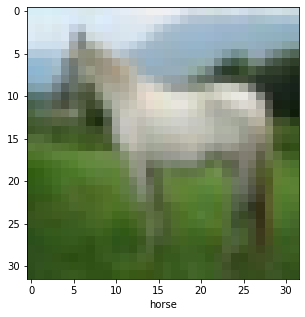

In [11]:
plot_sample(x_train, y_train,152)

In [12]:
x_train_rows = x_train.reshape(x_train.shape[0], 32*32*3) # all image in 1D form.
x_test_rows = x_test.reshape(x_test.shape[0], 32*32*3)
x_train_rows.shape # all RGB and width, height in 1D form

(50000, 3072)

In [13]:
print(x_train_rows[0]-x_train_rows[0])

[0 0 0 ... 0 0 0]


In [14]:
x_test_rows.shape

(10000, 3072)

In [15]:
x_train_rows.shape

(50000, 3072)

In [16]:
# euclidean distance between two image

def eu_distance(train_column, test_column):
    distance = 0.0
    for i in range(len(train_column)):
        distance += (train_column[i] - test_column[i])**2
        #print(distance)
    return np.sqrt(distance)
      
        
    
    

In [17]:
eu_distance(x_test_rows[0], x_test_rows[0])

0.0

In [18]:
train = 500 # total train data, for 50k and 10k check takes un-realistic time
test = 100 # total test data
dic_distance = {}
accuracy = np.zeros(21) # for storing different k value accuracy

for i in range(test): # for test img (10k)
    for j in range(train): # for train img (50k)
        dic_distance.update({j:eu_distance(x_train_rows[j],x_test_rows[i])}) # storing distance in dictionar
    
    
    sorted_distance = sorted(dic_distance.items(), key = lambda v: v[1]) # sorted by value and store in a list
#     sorted_distance[0][0] first [] is order 0,1,2,.. and 2nd [] is 0=index, 1=distance
#     print("from list min : ",sorted_distance[0][1]," v: ",sorted_distance[0][0])
    
    
    
    # check test and train img for different k value (0 to 20)
    for k in range(0,20): 
        occurrence = np.zeros(11)
        for c in range(k+1):
            occurrence[y_train[sorted_distance[k][0]]] +=1
            
        if y_train[np.argmax(occurrence)] == y_test[i]: # check with max occurrence matches image
#             print("match, train is : ",y_train[sorted_distance[k][0]]," and test : ",y_test[i]," i j is : ",i," ",j)
#             print(" ")
            accuracy[k+1] +=1

        
        
    

       
    

/tmp/ipykernel_75287/2167247119.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  distance += (train_column[i] - test_column[i])**2


In [19]:
# accuracy
for i in range(len(accuracy)):
    accuracy[i] = (accuracy[i]/test)*100
print(accuracy)

[ 0. 18. 13. 13. 11.  9.  8. 11.  8. 11. 10.  8. 12.  8.  9. 12. 15. 14.
 12.  9. 11.]


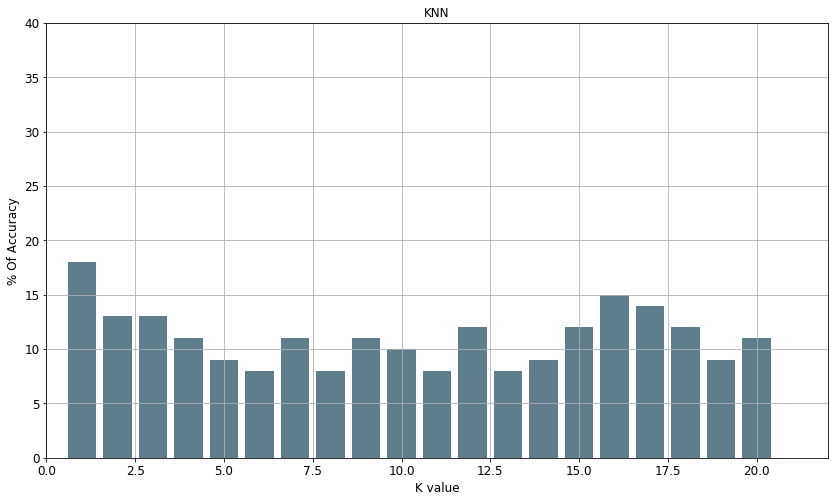

In [20]:
plt.figure(figsize=(14,8))
plt.xlabel('K value',fontsize=12)
plt.ylabel('% Of Accuracy',fontsize=12)
plt.title('KNN')
plt.xlim(0,22)
plt.ylim(0,40)
plt.grid()
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.bar(range(len(accuracy)),accuracy, color='#607D8B')
plt.show()

In [21]:
# Error
for i in range(len(accuracy)):
    accuracy[i] = 100 - accuracy[i]
    
accuracy[0]= 0.0



<Figure size 432x288 with 0 Axes>

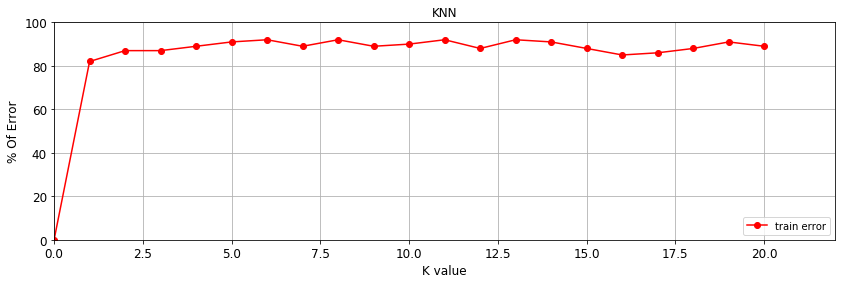

In [22]:
plt.figure()
plt.figure(figsize=(14,4))
plt.plot(accuracy, 'or-', label='train error')
plt.legend(loc='lower right')
plt.grid()
plt.title('KNN')
plt.xlim(0,22)
plt.ylim(0,100)
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.xlabel('K value',fontsize=12)
plt.ylabel('% Of Error',fontsize=12)
plt.show()




In K-NN, classify unknown data points by the nearest data point.in this case, we choose 500 train and 100 test data, though we have 50k train data and 10k test data but to find the distance between two images takes lots of time for all 60k data.
after that, we calculate different K values (1 to 20). The accuracy of our model is very low for each of the K values. it was always below 20% accuracy. for lower k value we found relatively good results then it gradually decreases and again it increases.
after observing all the results we can say that K-NN is not a good choice for image classification as its accuracy level is below average.

In [23]:
# print("from list 3rd min : ",sorted_distance[2][1]," v: ",sorted_distance[2][0])
# print(sorted_distance)
# print(y_test[30])
# print(y_train[7])
# print((accuracy[19]/test)*100,"%")
# print(dis[0])
# print(dic_distance[0])
# print(sorted_distance[0])
# sorted_distance = sorted(dic_distance.items(), key = lambda v: v[1]) # sorted by value and store in a same dictionary
# dic = sorted(dic.items(), key = lambda v: v[1]) # sorted by value and store in a same dictionary
